In [1]:
import mlbugdetection
import pickle
import pandas as pd

In [2]:
with open('../model/cancer_mama_model_gradient_boosting.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
X_train = pd.read_csv("../data/cancer_mama_check.csv") 
X_train = X_train.drop(columns=['Unnamed: 0'])

df_diagnosis = pd.read_csv("../data/cancer_mama_check_answer.csv") 
df_diagnosis = df_diagnosis.drop(columns=['Unnamed: 0'])
y_train = df_diagnosis['diagnosis'].ravel()

df_full = pd.concat([X_train, df_diagnosis], axis=1)
df_full.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,19.48,70.89,357.1,0.13600,0.16360,0.07162,0.04074,0.2434,0.08488,B
1,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,0.1472,0.05561,...,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932,B
2,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.07944,0.1927,0.06487,...,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390,M
3,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,B
4,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,B


In [19]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.880,19.48,70.89,357.1,0.13600,0.16360,0.07162,0.04074,0.2434,0.08488
1,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,0.1472,0.05561,...,12.900,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932
2,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.07944,0.1927,0.06487,...,23.320,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390
3,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.220,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
4,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039


In [5]:
atributos = X_train.columns.to_list()
important = pd.DataFrame({'attr': atributos, 'value': model.feature_importances_})
important.sort_values(by='value', ascending=False)

,attr,value
20,radius_worst,0.473144
22,perimeter_worst,0.245862
27,concave points_worst,0.105144
23,area_worst,0.049457
21,texture_worst,0.023190
7,concave points_mean,0.020562
13,area_se,0.018702
11,texture_se,0.016163
1,texture_mean,0.014731
26,concavity_worst,0.007602


In [9]:
from mlbugdetection.monotonic import monotonicity_mse, check_monotonicity

help(check_monotonicity)

Help on function check_monotonicity in module mlbugdetection.monotonic:

check_monotonicity(model, sample, feature, start, stop, steps=100)
    Monotonicity Analysis
    
    Parameters
    ----------
    model : sklearn model or str
        Model that will be used to make predictions. Could be a model object or a path to a model file.
    
    sample : pandas.DataFrame
        Pandas DataFrame containing one row that will be used as base point.
    
    feature : str
        Name of the feature being analysed.
    
    start : int
        The starting value of the feature's interval.
    
    stop : int
        The end value of the feature's interval.
    
    steps : int, default=100
        Number of values that will be atributed to the analysed feature. Must be non-negative.
    
    Returns
    -------
    AnalysisReport object with following attributes:
        For more information:
        >>> from mlbugdetection.analysis_report import AnalysisReport
        >>> help(AnalysisRep

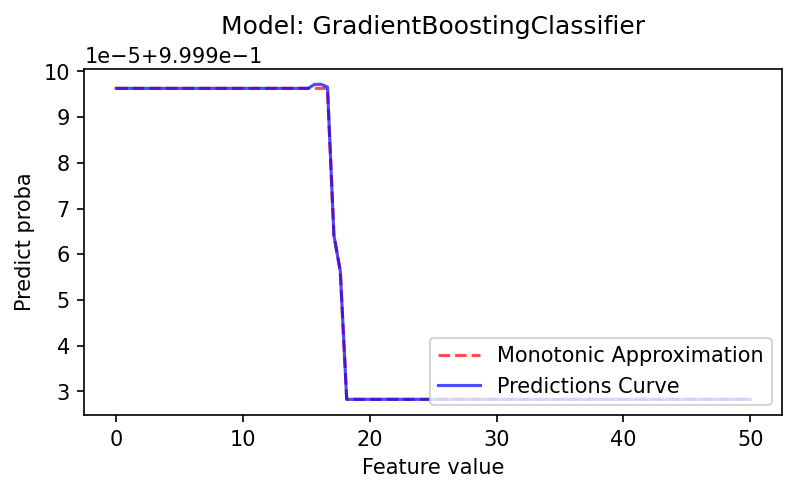

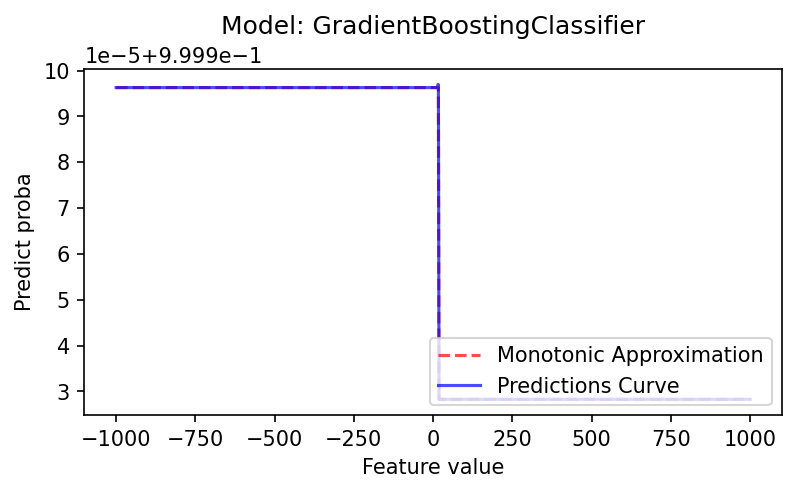

In [31]:
import warnings
warnings.filterwarnings('ignore')

#
# para usar esta funcao eh necessario saber o min e max do atributo a ser analisado
#

row = X_train.loc[0:0]

check_monotonicity(model, row, 'radius_worst', 0, 50, steps=100)

check_monotonicity(model, row, 'radius_worst', -1000, 1000, steps=2000)

{'monotonic': False, 'monotonic_score': 1.628791551862334e-14}

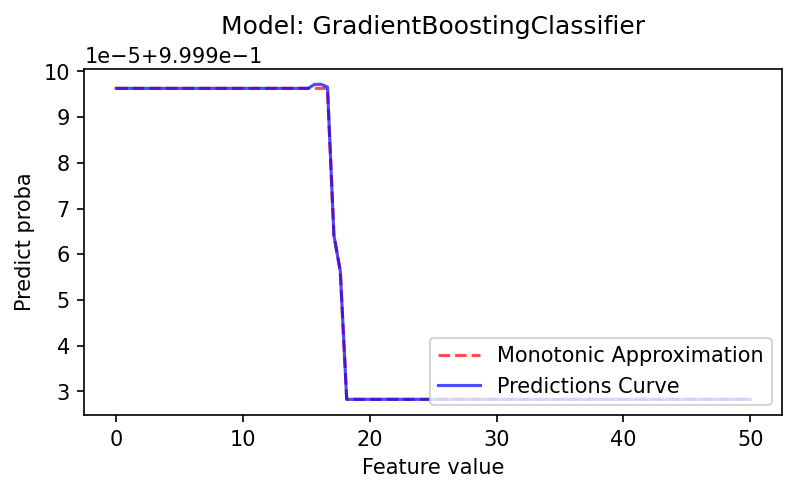

In [35]:
r = check_monotonicity(model, row, 'radius_worst', 0, 50, steps=100)

In [34]:
r.metrics

{'monotonic': False, 'monotonic_score': 1.628791551862334e-14}

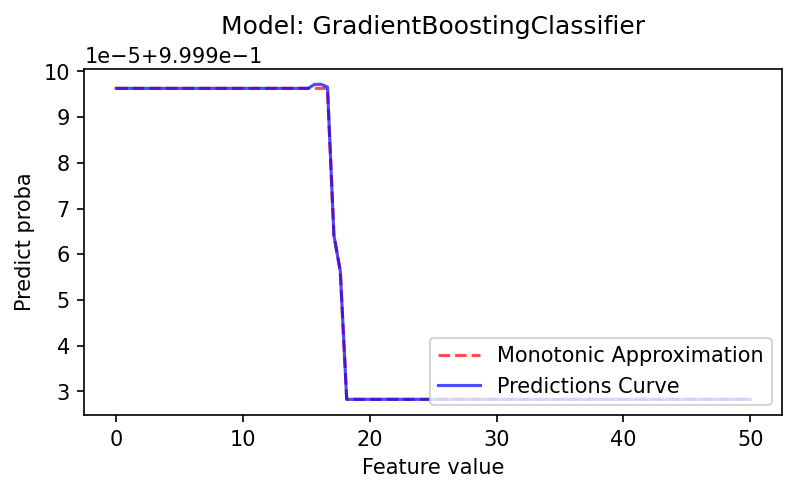

In [37]:
r.graphs[0]

Attribute: radius_mean
Attribute: texture_mean
Attribute: perimeter_mean
Attribute: area_mean
Attribute: smoothness_mean
Attribute: compactness_mean
Attribute: concavity_mean
Attribute: concave points_mean
Attribute: symmetry_mean
Attribute: fractal_dimension_mean
Attribute: radius_se
Attribute: texture_se
Attribute: perimeter_se
Attribute: area_se
Attribute: smoothness_se
Attribute: compactness_se
Attribute: concavity_se
Attribute: concave points_se
Attribute: symmetry_se
Attribute: fractal_dimension_se
Attribute: radius_worst
Attribute: texture_worst
Attribute: perimeter_worst
Attribute: area_worst
Attribute: smoothness_worst
Attribute: compactness_worst
Attribute: concavity_worst
Attribute: concave points_worst
Attribute: symmetry_worst
Attribute: fractal_dimension_worst


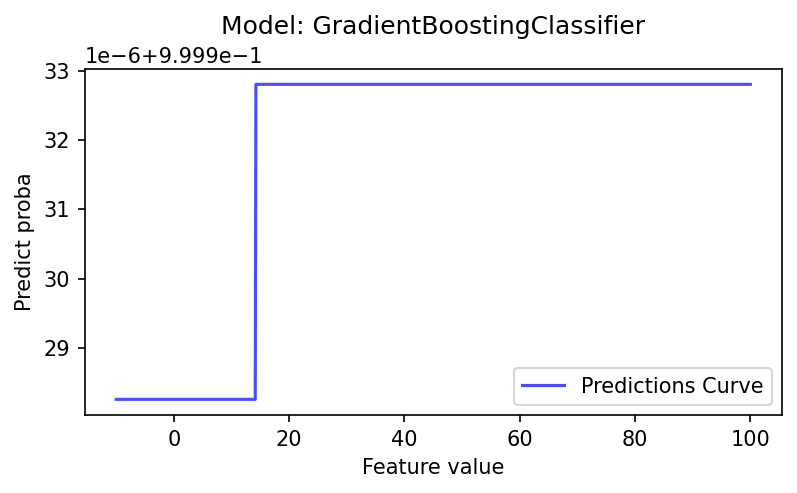

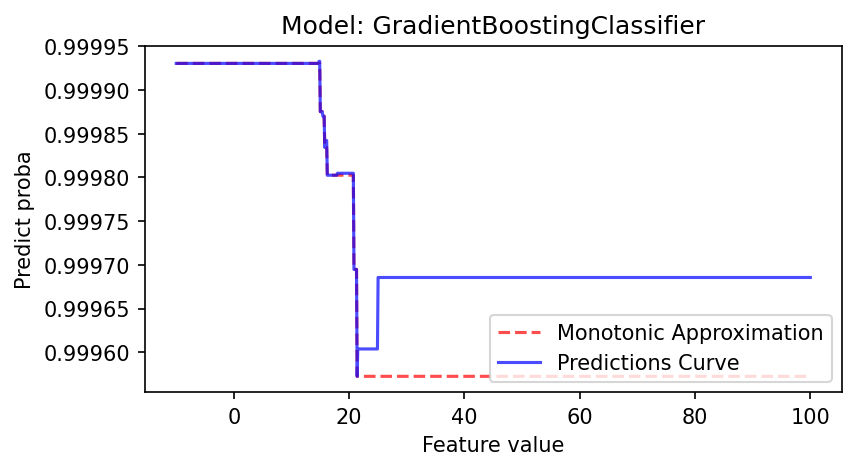

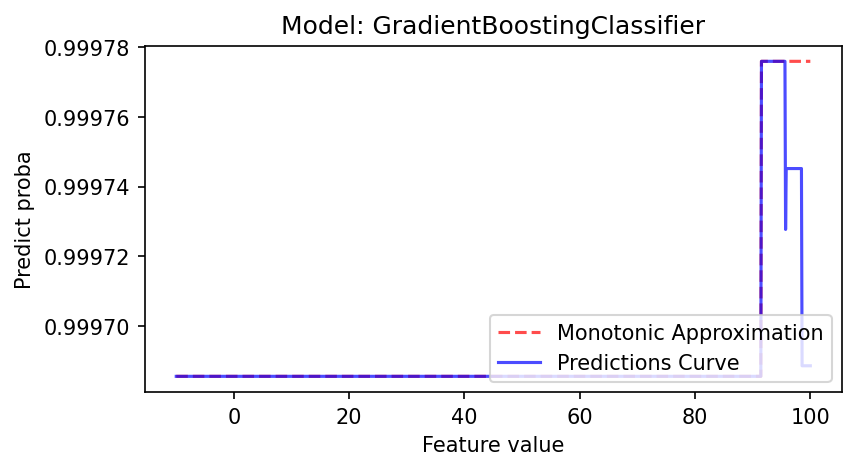

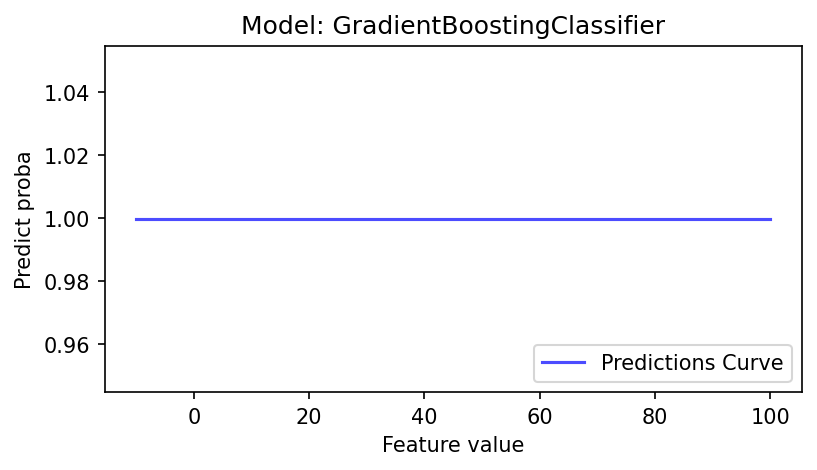

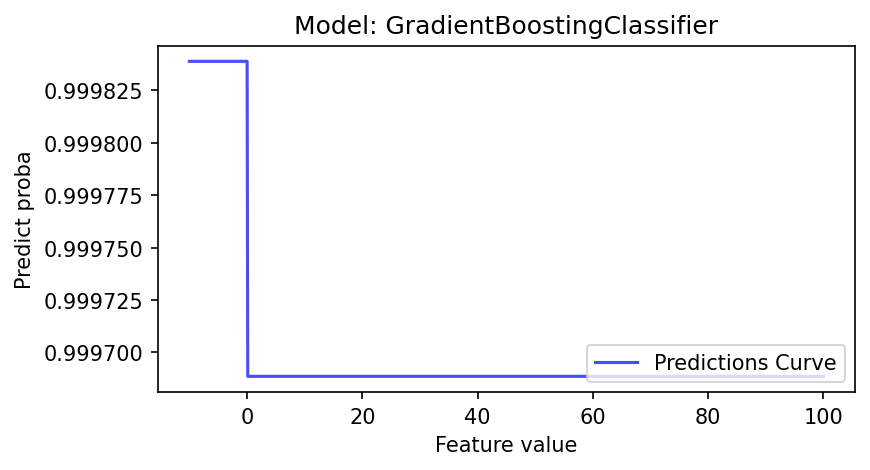

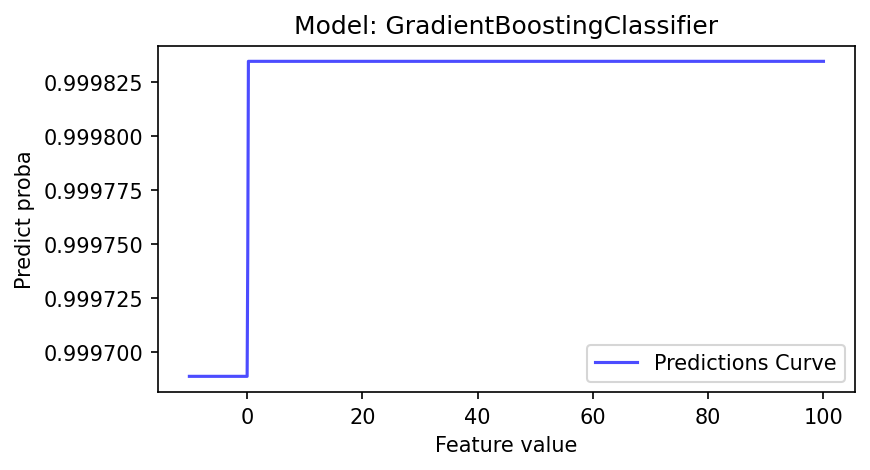

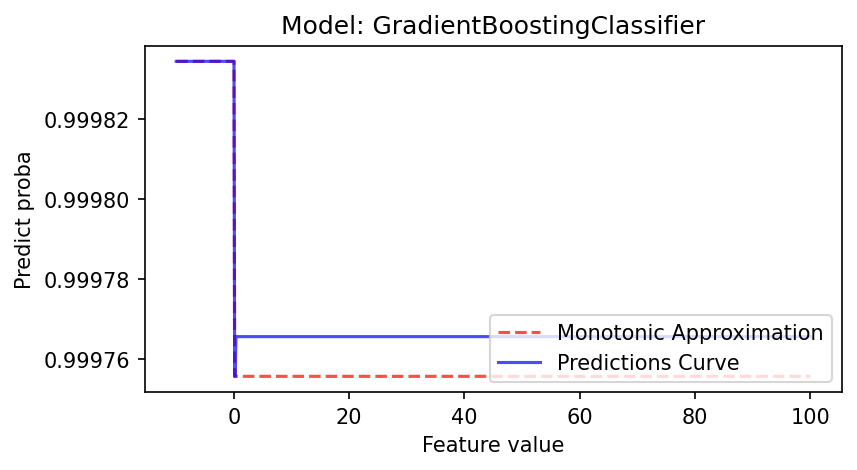

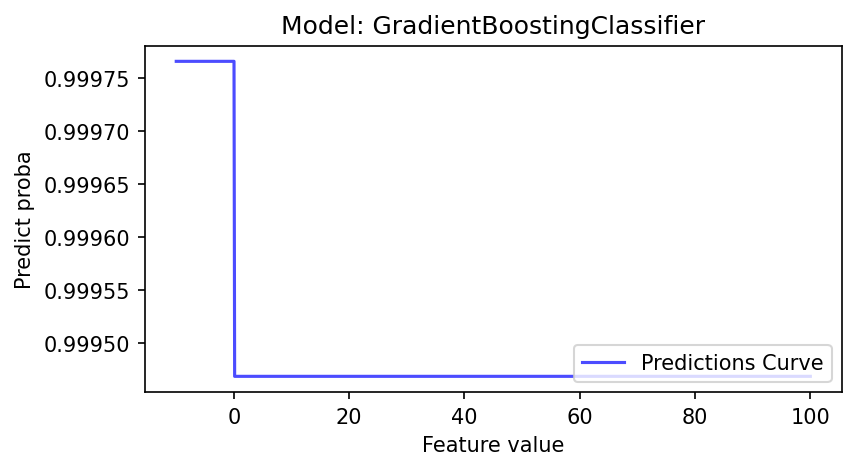

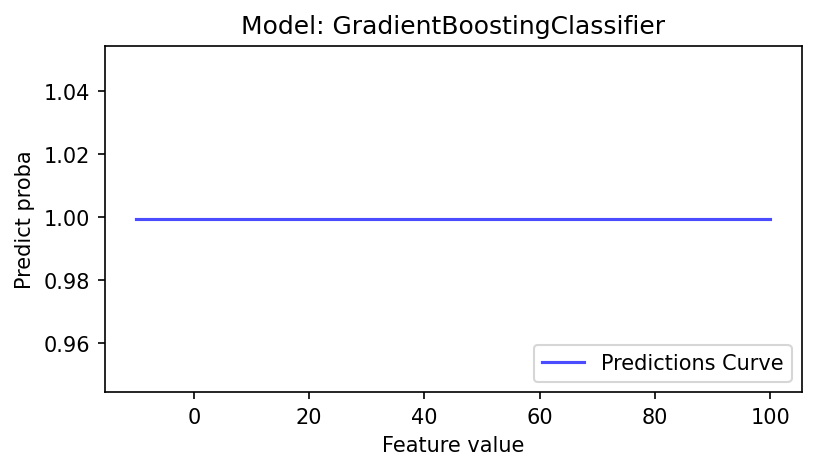

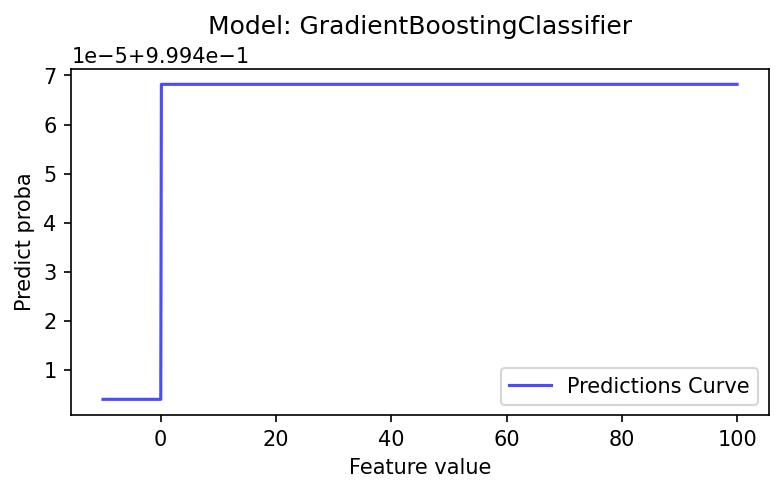

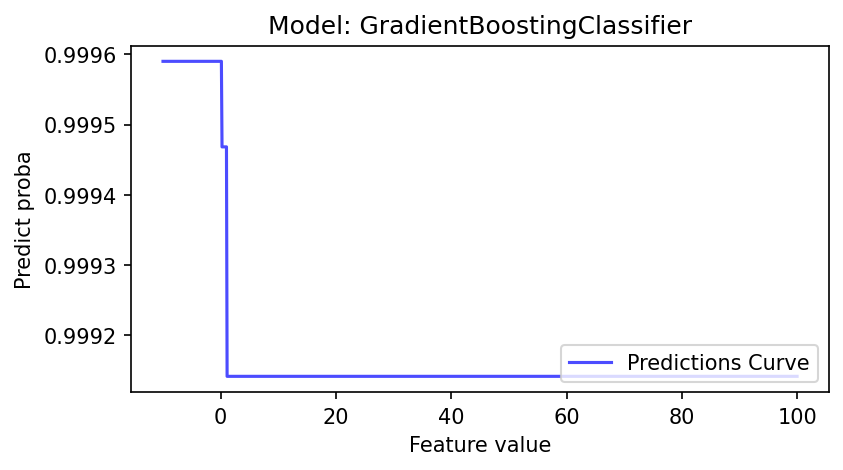

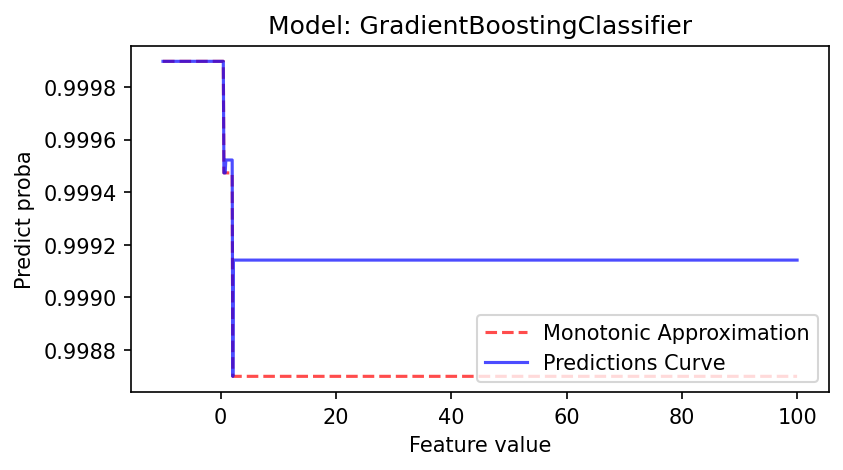

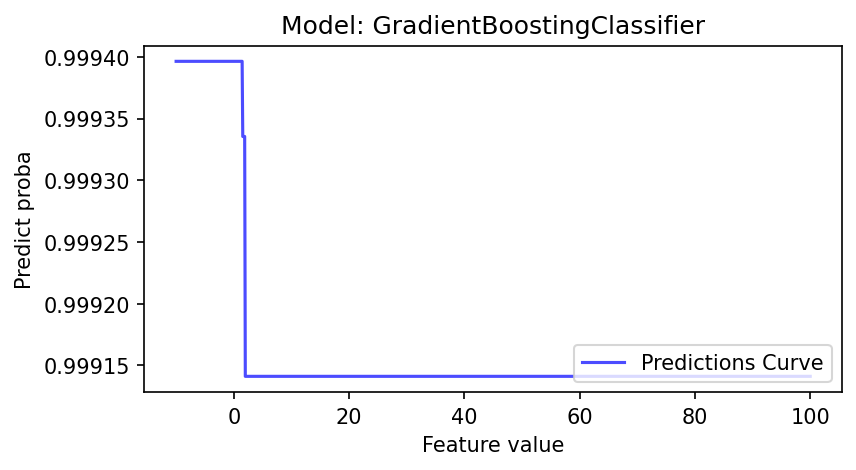

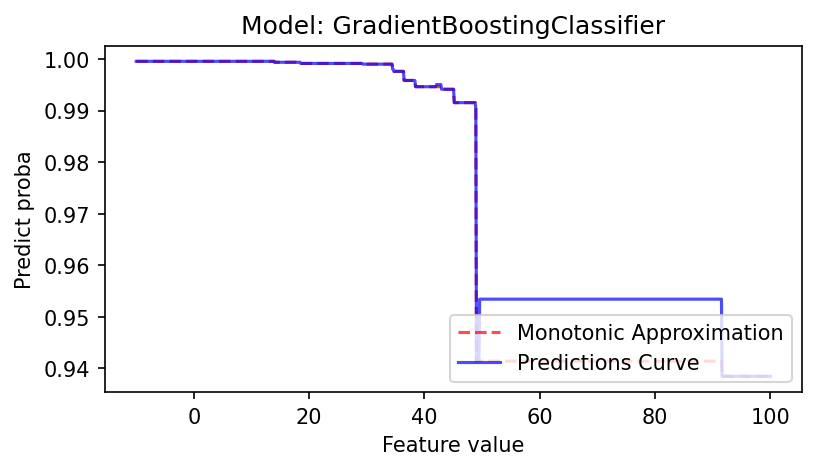

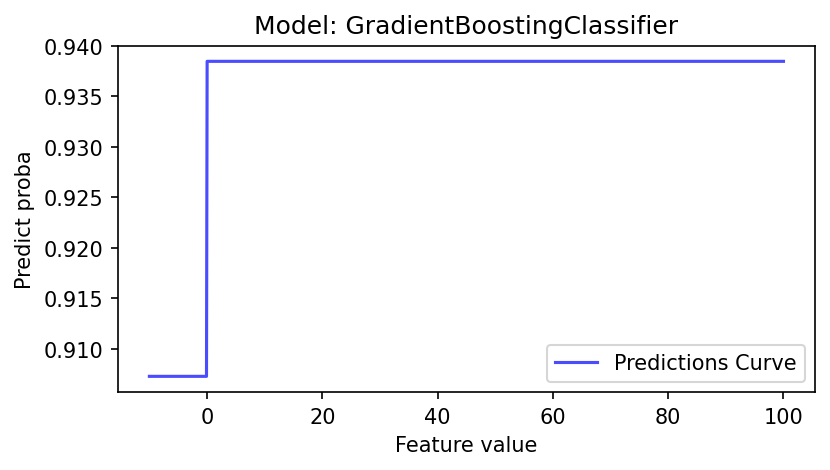

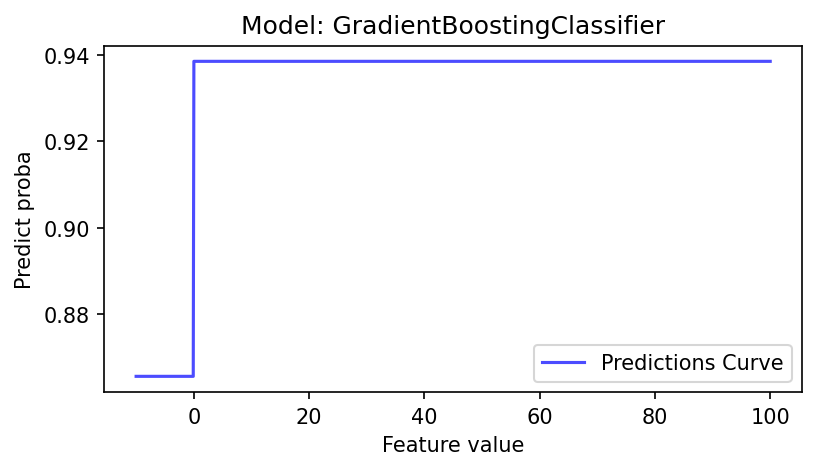

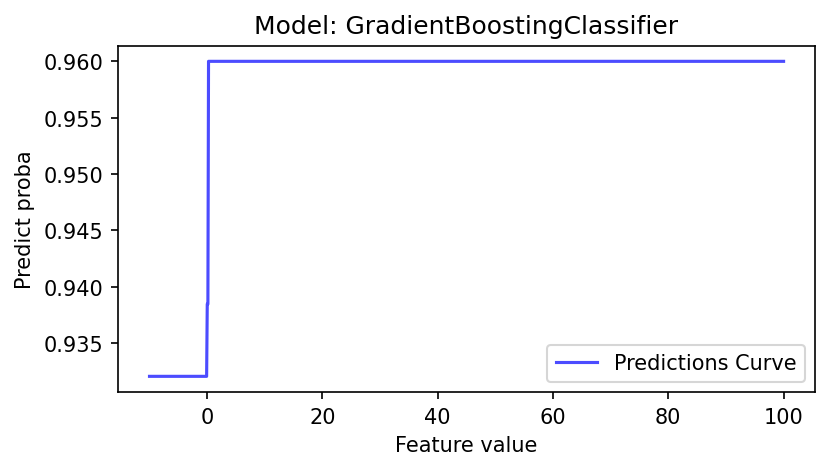

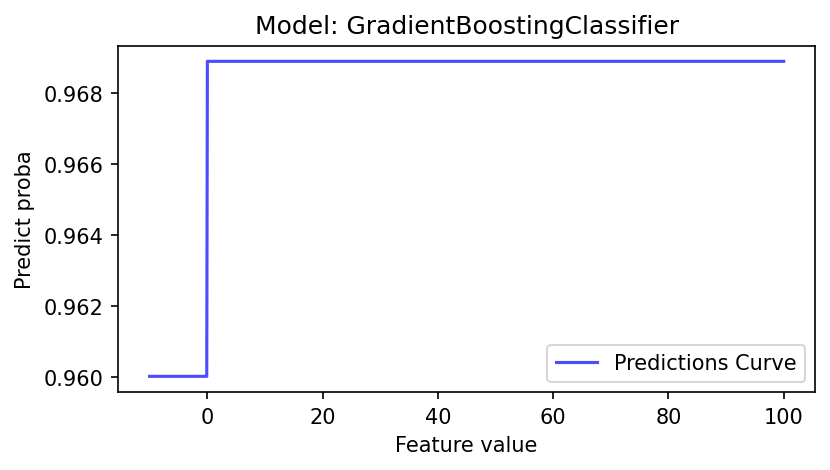

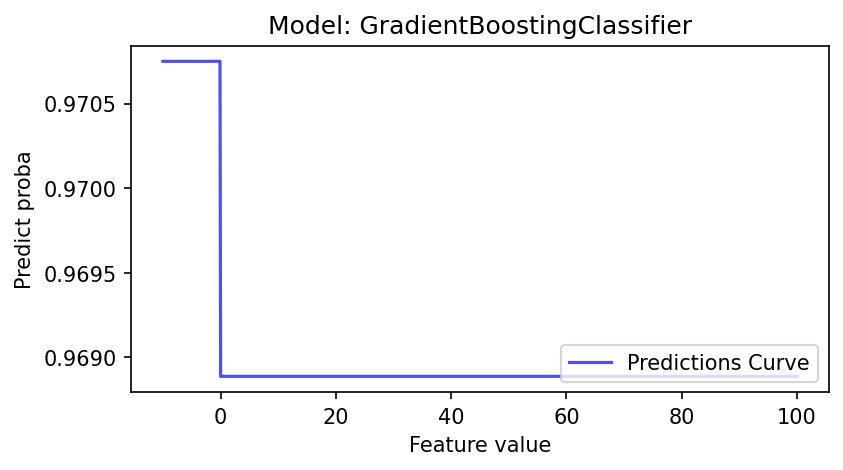

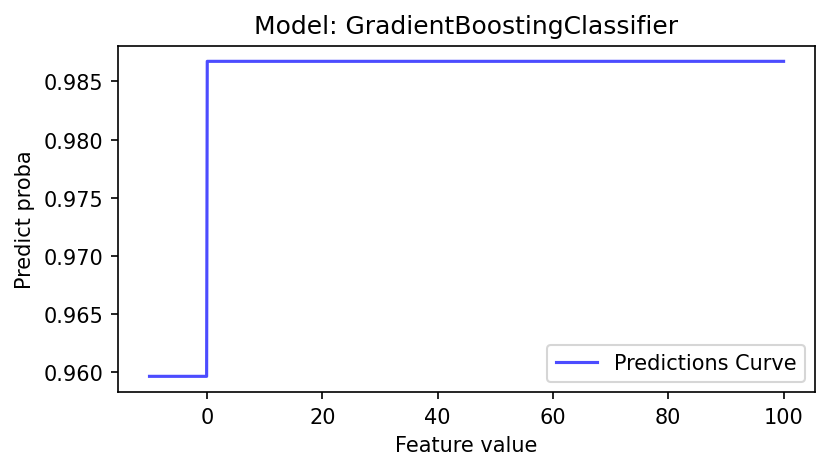

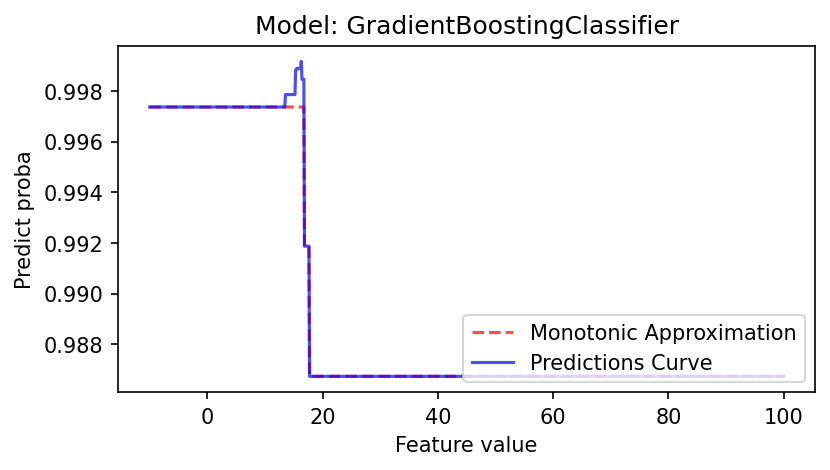

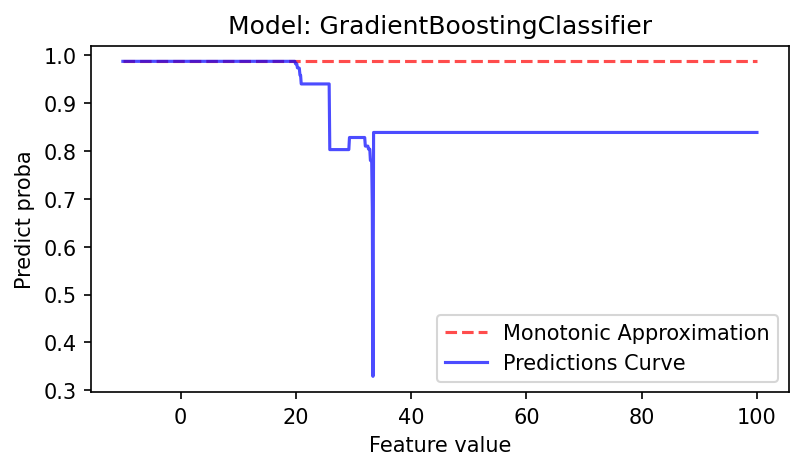

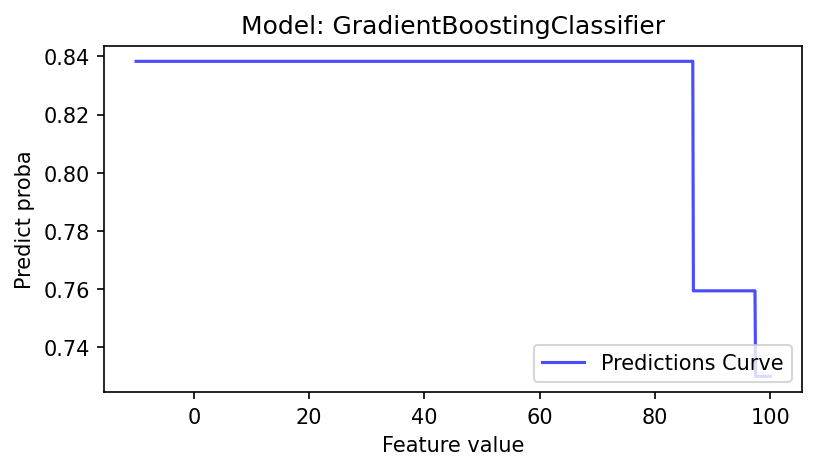

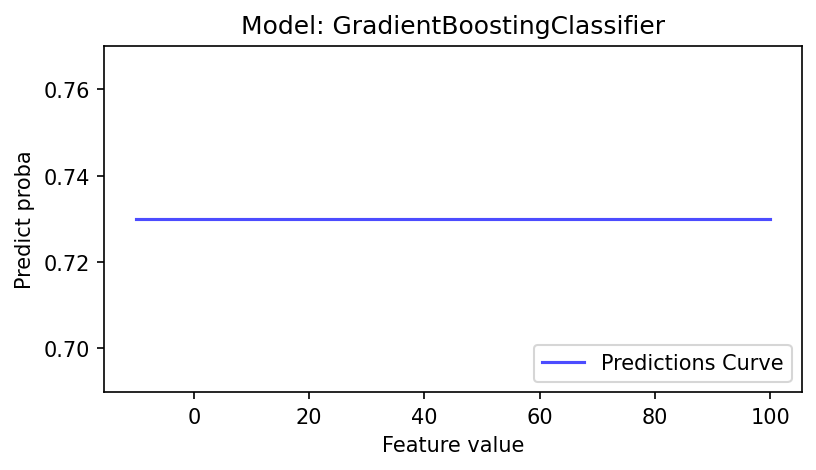

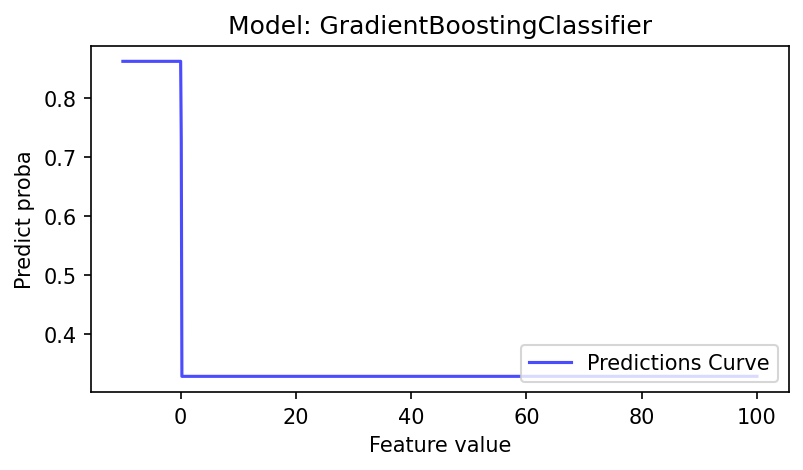

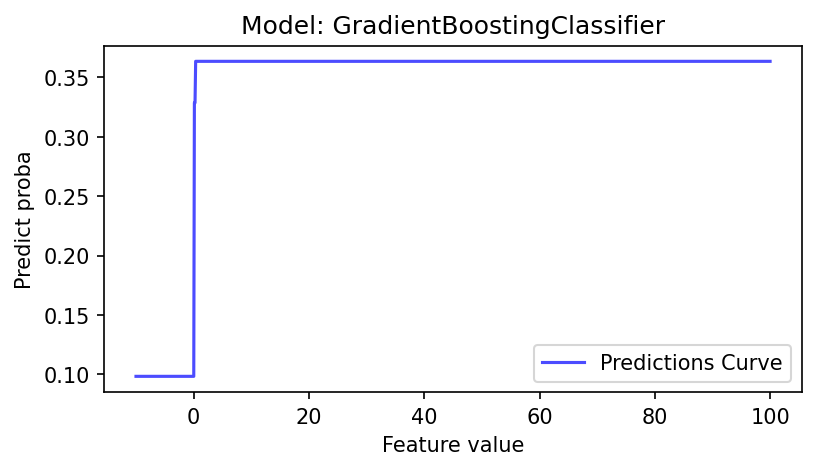

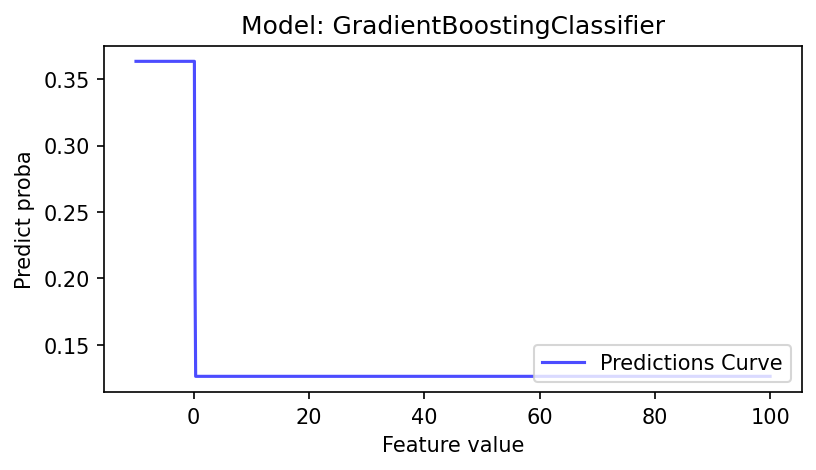

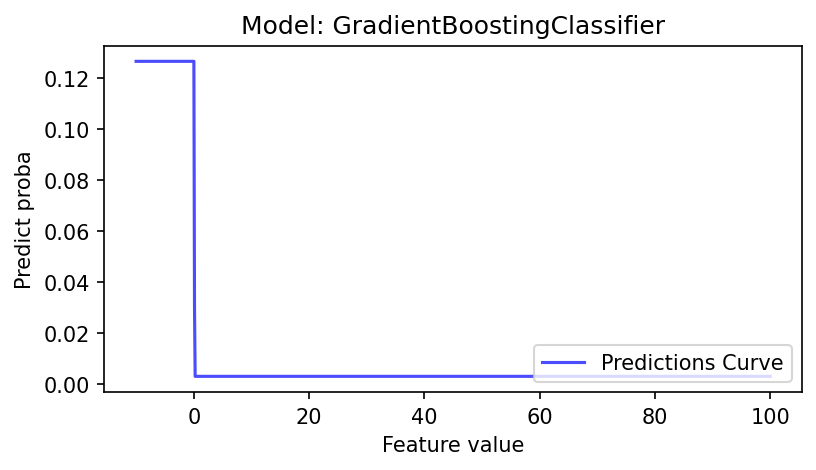

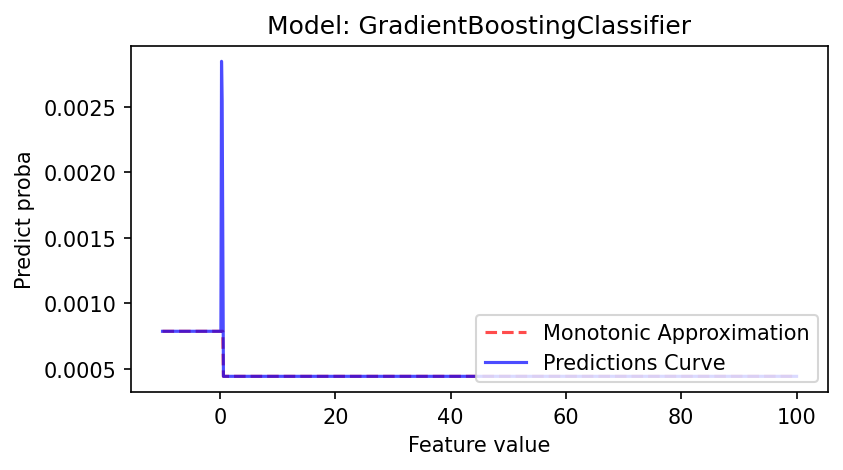

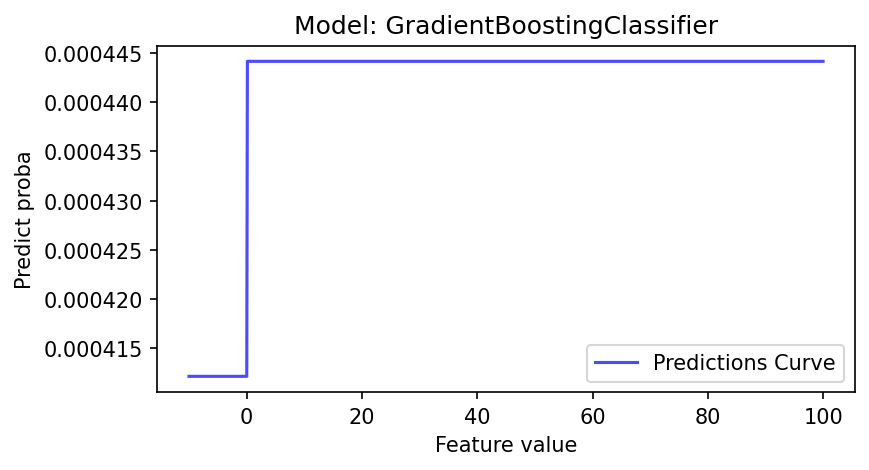

In [39]:
results = []
for attr in X_train.columns.to_list():
    print(f'Attribute: {attr}')
    r = check_monotonicity(model, row, attr, -10, 100, steps=1000)
    results.append(r) 

['radius_worst', 'perimeter_worst', 'concave points_worst', 'area_worst']
Attribute: radius_worst
Attribute: perimeter_worst
Attribute: concave points_worst
Attribute: area_worst


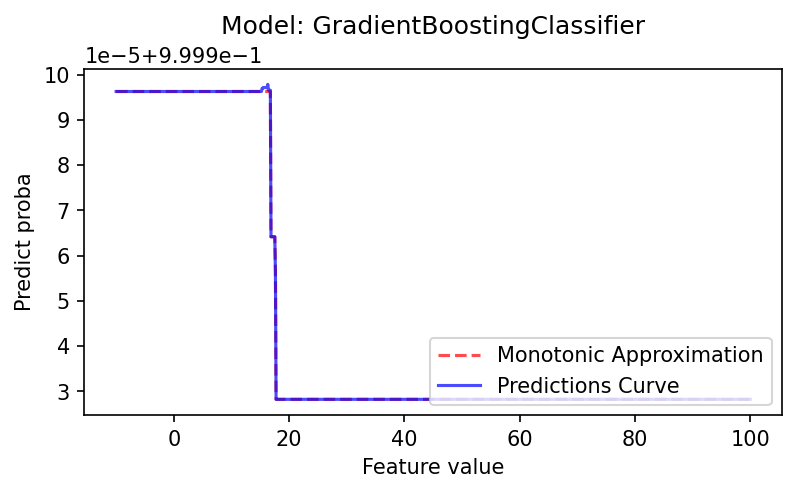

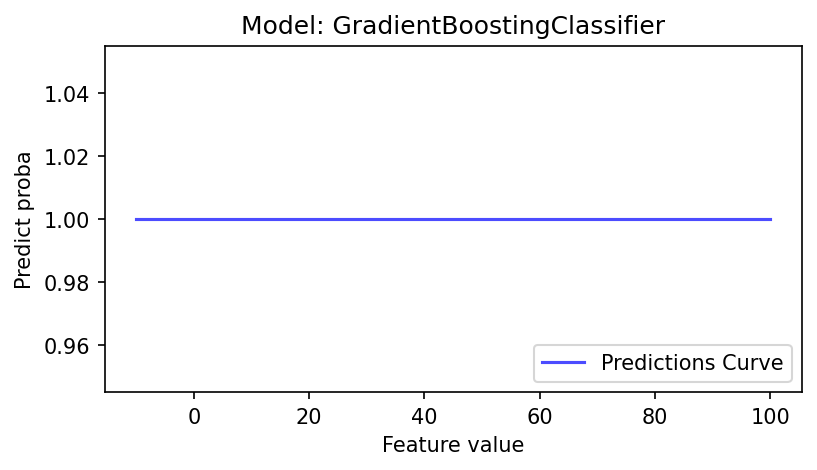

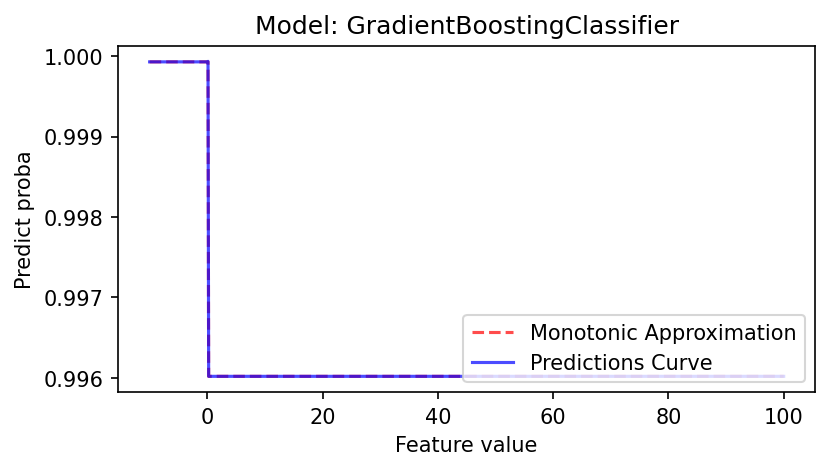

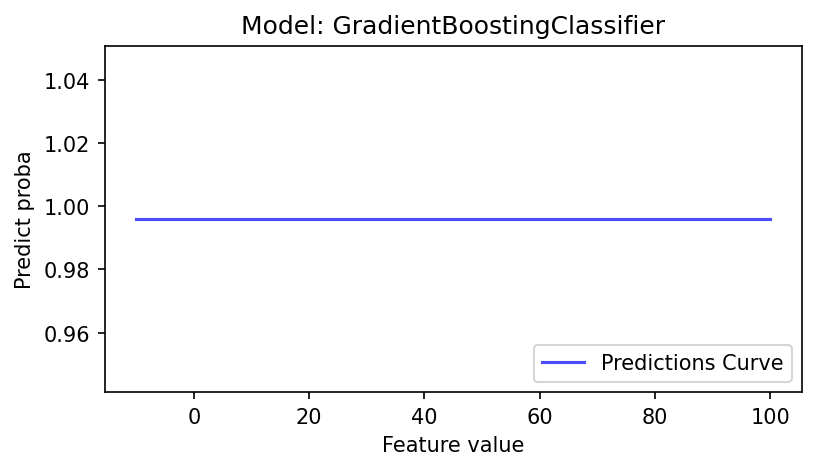

In [50]:
#
# analisando os N mais importantes atributos
#

row = X_train.loc[0:0]

N = 4

atributos = X_train.columns.to_list()
important = pd.DataFrame({'attr': atributos, 'value': model.feature_importances_})
most_import = important.sort_values(by='value', ascending=False)[0:N]['attr'].to_list()

print(most_import)

results = []
for attr in most_import:
    print(f'Attribute: {attr}')
    r = check_monotonicity(model, row, attr, -10, 100, steps=1000)
    results.append(r) 

In [51]:
for r in results:
    print(f'{r.analysed_feature} = {r.metrics}')

radius_worst = {'monotonic': False, 'monotonic_score': 9.260693228380061e-15}
perimeter_worst = {'monotonic': True, 'monotonic_score': 1}
concave points_worst = {'monotonic': False, 'monotonic_score': 4.2799893544533023e-14}
area_worst = {'monotonic': True, 'monotonic_score': 1}


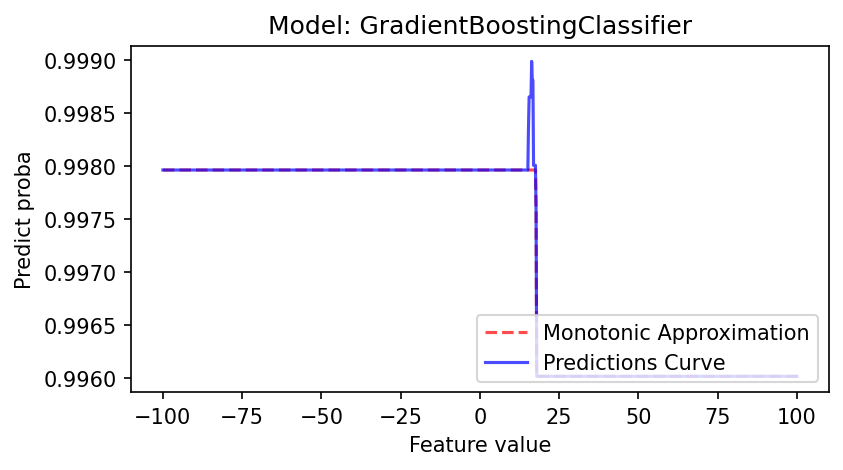

In [54]:
r = check_monotonicity(model, row, 'radius_worst', -100, 100, steps=1000)

In [55]:
r.metrics

{'monotonic': False, 'monotonic_score': 4.5438759419962395e-09}

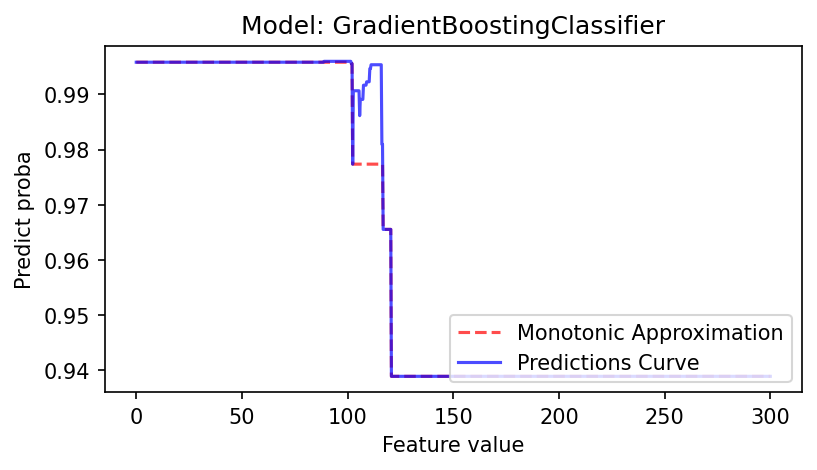

In [56]:
r = check_monotonicity(model, row, 'perimeter_worst', 0, 300, steps=1000)

In [57]:
r.metrics

{'monotonic': False, 'monotonic_score': 1.0858321165929841e-05}

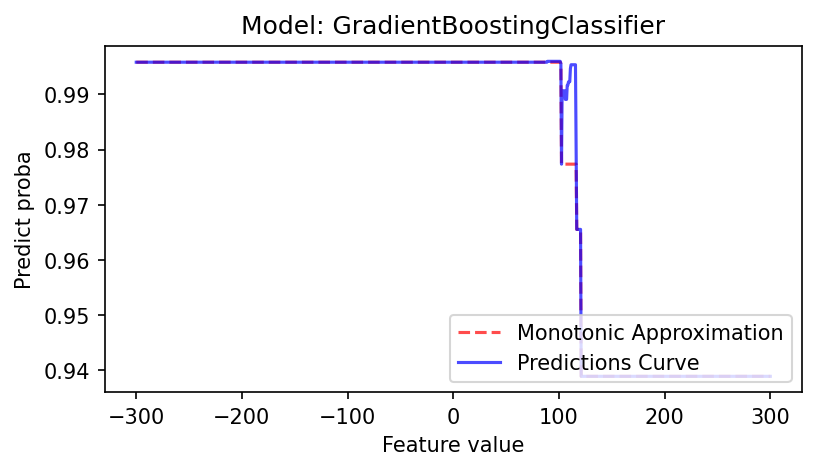

In [58]:
r = check_monotonicity(model, row, 'perimeter_worst', -300, 300, steps=1000)

In [59]:
r.metrics

{'monotonic': False, 'monotonic_score': 5.305560498736716e-06}

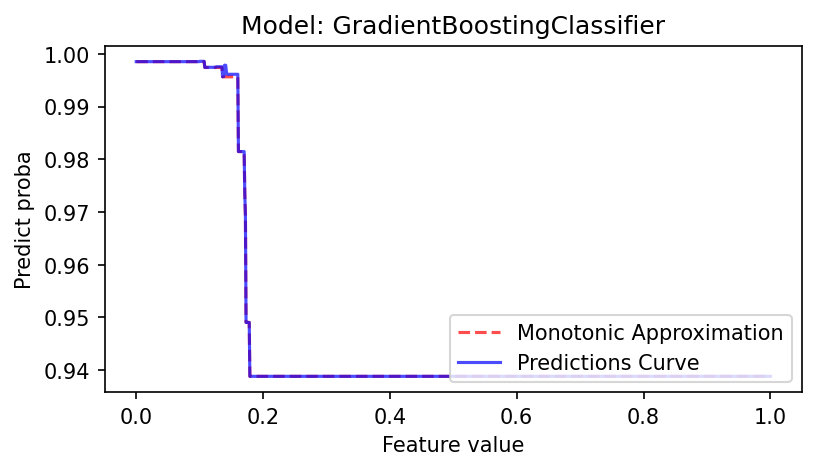

In [60]:
r = check_monotonicity(model, row, 'concave points_worst', 0, 1, steps=1000)


In [61]:
r.metrics

{'monotonic': False, 'monotonic_score': 1.9851086051441923e-08}

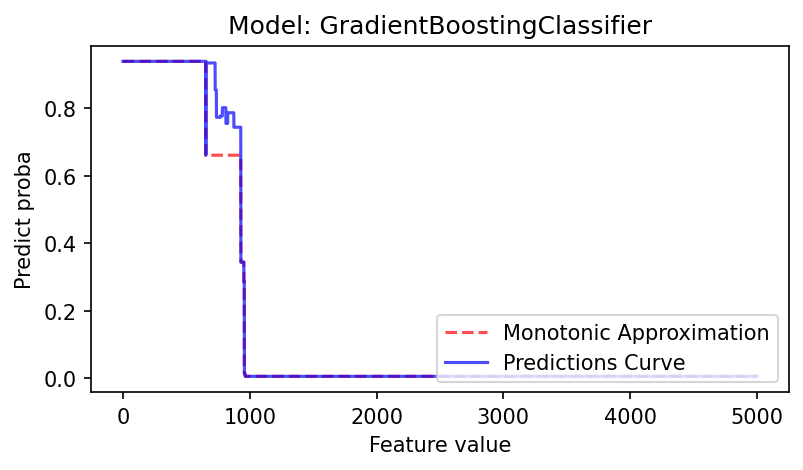

In [62]:
r = check_monotonicity(model, row, 'area_worst', 0, 5000, steps=10000)

In [63]:
r.metrics

{'monotonic': False, 'monotonic_score': 0.0016333864928364998}

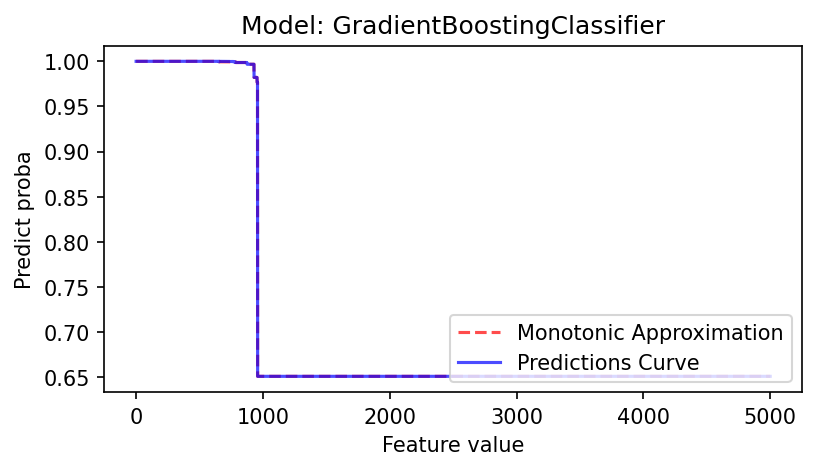

In [66]:
row = X_train.loc[1:1]
r = check_monotonicity(model, row, 'area_worst', 0, 5000, steps=10000)

In [67]:
r.metrics

{'monotonic': False, 'monotonic_score': 3.6605391394337938e-09}

{'monotonic': False, 'monotonic_score': 5.421562849082071e-11}
{'monotonic': False, 'monotonic_score': 3.6931406739381347e-09}
{'monotonic': False, 'monotonic_score': 2.273726289487607e-10}
{'monotonic': False, 'monotonic_score': 9.003352650569665e-10}
{'monotonic': False, 'monotonic_score': 4.869138092701233e-09}


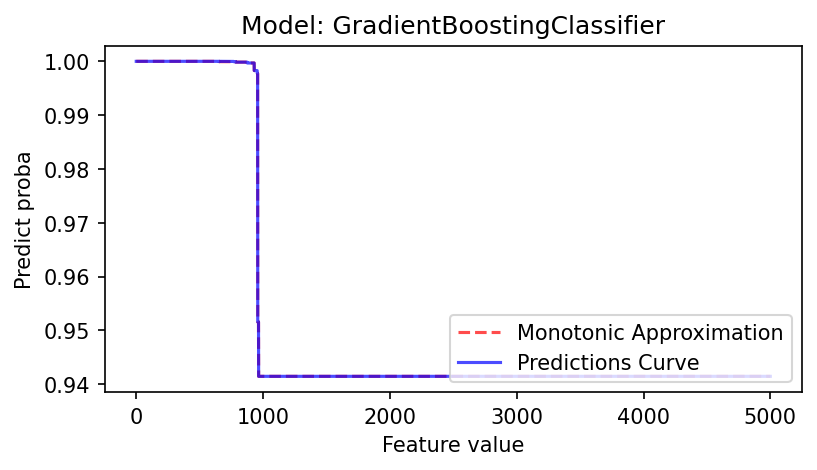

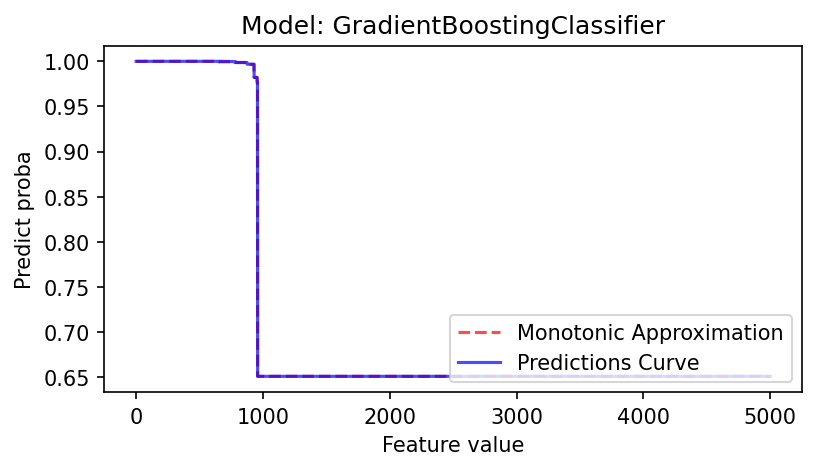

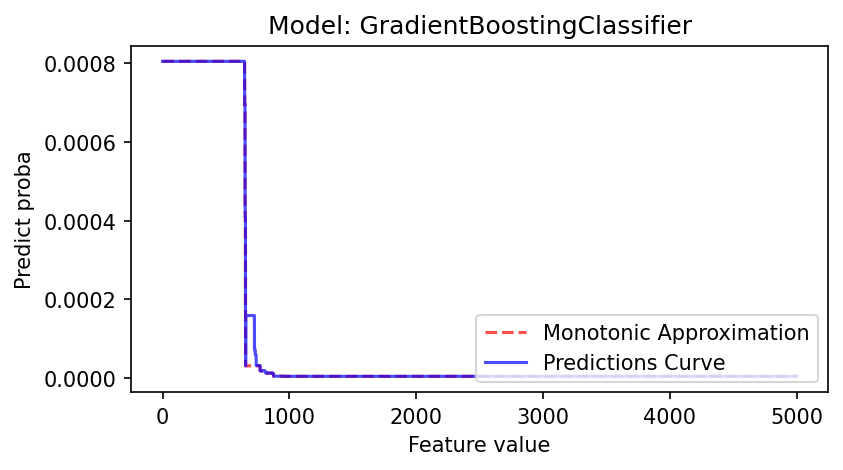

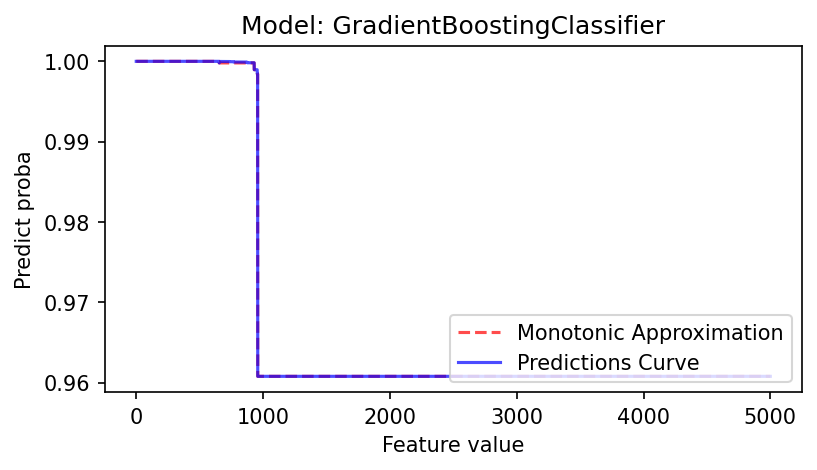

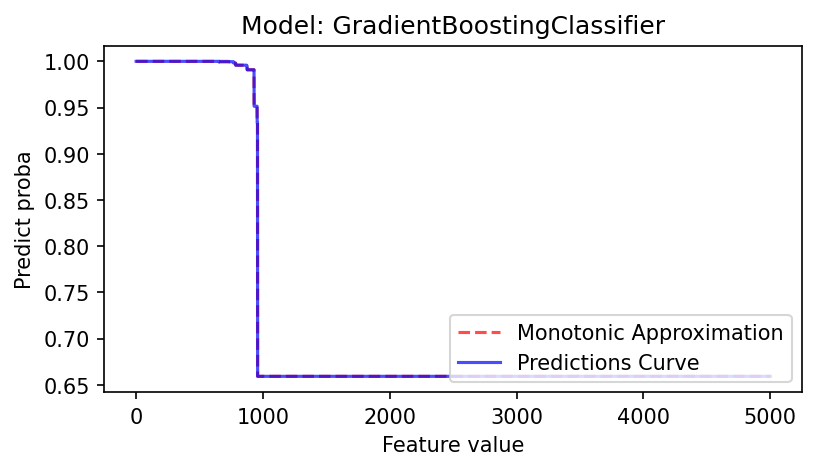

In [68]:
for i in range(0,5):
    row = X_train.loc[i:i]
    r = check_monotonicity(model, row, 'area_worst', 0, 5000, steps=10000)
    print(r.metrics)

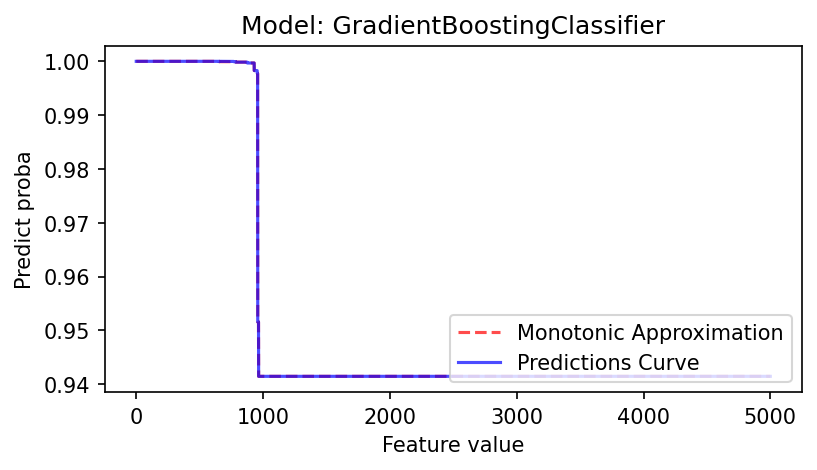

In [69]:
r = check_monotonicity(model, X_train, 'area_worst', 0, 5000, steps=10000)

In [70]:
r.metrics

{'monotonic': False, 'monotonic_score': 5.421562849082071e-11}